## Import

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from matplotlib import font_manager
import seaborn as sns

## Fonts

In [2]:
# Font
font_location = '/Library/Fonts/Arial unicode.ttf'
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

## Read csv

In [3]:
# Read csv

# encoding cp949
data = pd.read_csv('./temp/fire.csv', encoding='cp949', sep=',')

data

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류,장소소분류
0,2019-01-01 00:03,강원도,삼척시,오분동,기타(쓰레기 화재등),"폭발물, 폭죽",폭죽,부주의,폭죽놀이,"종이,목재,건초등","풀, 나뭇잎",1,0,1,0,기타,야외,기타야외
1,2019-01-01 00:06,경기도,평택시,안중읍,"건축,구조물",미상,미상,미상,미상,미상,미상,0,0,0,14900,주거,단독주택,단독주택
2,2019-01-01 00:40,서울특별시,성북구,하월곡동,"자동차,철도차량",미상,미상,미상,미상,미상,미상,0,0,0,3642,"자동차,철도차량",자동차,승용자동차
3,2019-01-01 00:52,경기도,이천시,설성면,기타(쓰레기 화재등),화학적 발화열,화학반응열,화학적 요인,자연발화,"종이,목재,건초등","풀, 나뭇잎",0,0,0,1848,기타,야외,야적장
4,2019-01-01 01:06,부산광역시,부산진구,당감동,"건축,구조물",작동기기,기타(작동기기),전기적 요인,절연열화에 의한 단락,"전기,전자","전기, 전자기기 기판",0,0,0,45,기타서비스,기타건축물,기타 건축물
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40098,2019-12-31 22:33,경기도,파주시,광탄면,"건축,구조물",작동기기,전기적 아크(단락),전기적 요인,접촉불량에 의한 단락,"전기,전자",전선피복,0,0,0,23707,산업시설,공장시설,제재 및 목공업
40099,2019-12-31 22:45,경상북도,경산시,남방동,"건축,구조물",미상,미상,미상,미상,"종이,목재,건초등",건초,0,0,0,3542,산업시설,동식물시설,기타 동식물시설
40100,2019-12-31 22:47,부산광역시,남구,문현동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,음식물 조리중,식품,튀김유,0,0,0,0,"판매,업무시설",일반업무,오피스텔
40101,2019-12-31 23:05,제주특별자치도,제주시,외도일동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,가연물 근접방치,합성수지,"플라스틱, PVC, 비닐, 장판",0,0,0,105,"판매,업무시설",판매시설,할인점(마트)


## 날짜 파싱

In [4]:
# 년-월-일 표기
data['onlyDay'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%Y-%m-%d')

# 년-월 표기
data['onlyMonth'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%Y-%m')

# 일 표기
data['day'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%d')

# 1. 월 별 사망 사고 비율
## 데이터 처리

In [5]:
# 달별 합계
df_sumByMonth = data.groupby(data['onlyMonth']).sum()

# 화재 발생 회수 카운트
df_cntFireOccur= data['화재발생년월일'].groupby(data['onlyMonth']).count()

In [6]:
df_sumByMonth['발생회수'] = data['onlyMonth'].groupby(data['onlyMonth']).count()

In [7]:
# 히트맵용 데이터 프레임 - 화재 발생과 사망자, 부상자 간의 상관 관계

dfOccCor = pd.DataFrame()

dfOccCor = dfOccCor.append(df_sumByMonth['발생회수'])
dfOccCor = dfOccCor.append(df_sumByMonth['사망'])
dfOccCor = dfOccCor.append(df_sumByMonth['부상'])
dfOccCor

,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
발생회수,4430.0,3413.0,4267.0,3611.0,3990.0,2862.0,2956.0,2888.0,2703.0,2797.0,2949.0,3237.0
사망,35.0,38.0,29.0,30.0,24.0,12.0,15.0,21.0,21.0,16.0,19.0,25.0
부상,236.0,161.0,240.0,150.0,198.0,139.0,180.0,176.0,209.0,144.0,168.0,229.0


## 시각화 ( Graph )

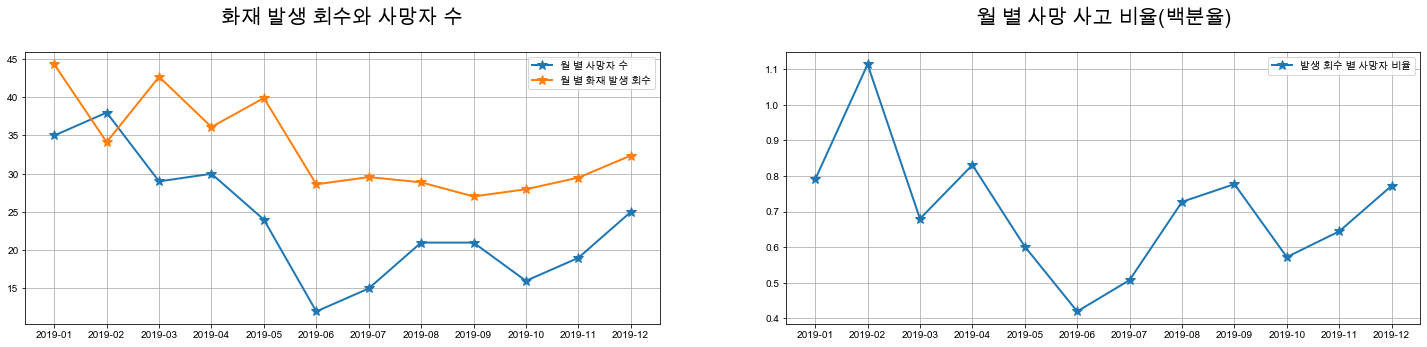

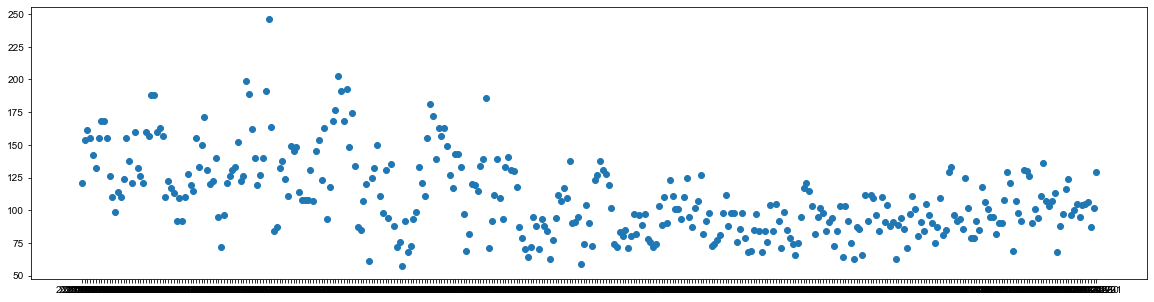

In [75]:
# Figure 1
# 월 별 사망 사고 비율
plt.figure(figsize=(25,5))

plt.subplot(121)
plt.plot(df_sumByMonth.index, df_sumByMonth['사망'], marker='*',markersize=10,linewidth=2, label='월 별 사망자 수')
plt.plot(df_sumByMonth.index, df_sumByMonth['발생회수']/100, marker='*',markersize=10,linewidth=2, label='월 별 화재 발생 회수')
plt.grid(True)
plt.legend()
plt.xlabel(u'')
plt.title('화재 발생 회수와 사망자 수\n', size=20)


plt.subplot(122)
plt.plot(df_sumByMonth.index, (df_sumByMonth['사망']/df_sumByMonth['발생회수'])*100, marker='*',markersize=10,linewidth=2, label='발생 회수 별 사망자 비율')
plt.grid(True)
plt.legend()
plt.xlabel(u'')
plt.title('월 별 사망 사고 비율(백분율)\n', size=20)



# Figure 2
plt.figure(figsize=(20,5))

plt.subplot(111)

# 일별 부상, 사망자, 발생 회수

df_CntType = data.groupby(data['onlyDay']).sum().iloc[:,[1,2]]
df_CntType['발생회수'] = data['onlyDay'].groupby(data['onlyDay']).count()

plt.scatter(df_CntType.index, df_CntType['발생회수'])

# 화재 유형 별 발생 비율과 재산 피해 비율
## 데이터 전처리

In [9]:
# Create DataFrame
df_dmgPerCase = data.groupby(data['화재유형']).sum()

# 화재 유형 별 화재 발생 건수
df_dmgPerCase['count'] = data['화재유형'].groupby(data['화재유형']).count()

# 화재 유형 별 건당 피해 액 수
df_dmgPerCase['건당피해'] = df_dmgPerCase['재산피해소계']/df_dmgPerCase['count']

# 필요한 열만 잘라내기
df_dmgPerCase = df_dmgPerCase.iloc[:,[0,3,4,5]]

# 정렬
df_srtDmgPerCase = df_dmgPerCase.sort_values('건당피해', ascending=False)

# 출력
df_dmgPerCase

,인명피해(명)소계,재산피해소계,count,건당피해
화재유형,,,,
"건축,구조물",1993,552840022,26025,21242.652142
기타(쓰레기 화재등),166,7633013,7020,1087.323789
"선박,항공기",27,60005851,108,555609.731481
"위험물,가스제조소등",19,6805927,29,234687.137931
임야,133,198547953,2211,89800.069199
"자동차,철도차량",177,32663468,4710,6934.918896


## 시각화 ( Pie )

Text(0, 0.5, '')

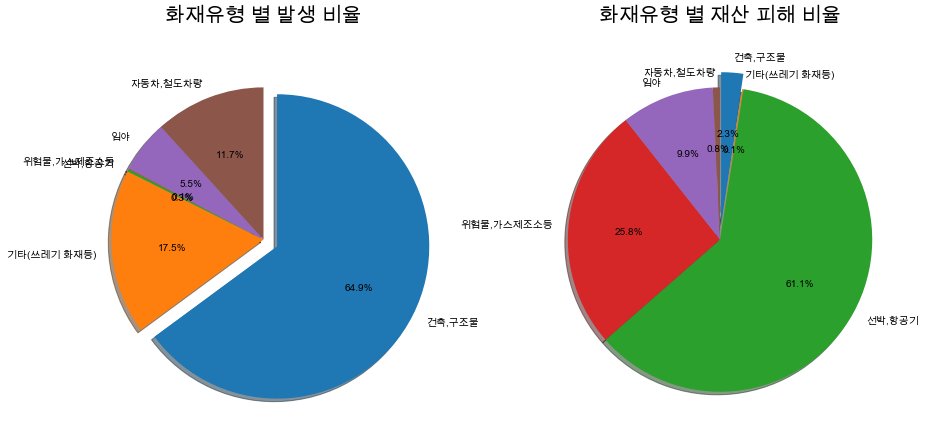

In [10]:
# Make figure
fig1= plt.figure()
# pie explode_value
explode_value = (0.1, 0, 0, 0, 0, 0)
# first chart location
ax2 = fig1.add_subplot(121)
# draw first pie chart
firepie = df_dmgPerCase['count'].plot.pie(figsize=(15,15), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax2)
firepie.set_title("화재유형 별 발생 비율\n", fontsize=20)
firepie.set_ylabel("")

# second chart location
ax3 = fig1.add_subplot(122)
# draw second pie chart
damagepie = df_dmgPerCase['건당피해'].plot.pie(figsize=(15,15), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax3)
damagepie.set_title("화재유형 별 재산 피해 비율\n", fontsize=20)
damagepie.set_ylabel("")

# Heatmap

## 데이터 전처리

In [11]:
# 날짜에서 달을 가져와서 +'월'로 붙여줌
data['month'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%m월')

In [12]:
# 중복된 데이터 제거하기
delDup = data.drop_duplicates('화재유형',keep='first') # 화재 유형 중복 제거
delMonth= data.drop_duplicates('month', keep='first') # 월 중복 제거

## 화재 유형 별 발생 회수 ( 데이터 전처리 )

In [13]:
# 결과 값 담을 프레임 생성
dfFstDiv = pd.DataFrame(index=delDup['화재유형'])

In [14]:
# 결과 프레임에 값 넣음
for i in delMonth['month']:
    month = data.month == i
    df_firePerMonth = data.loc[month,:]
    dfTemp=df_firePerMonth['화재유형'].groupby(df_firePerMonth['화재유형']).count().to_frame()
    dfTemp = dfTemp.rename(columns={'화재유형':i})
    dfFstDiv = dfFstDiv.join(dfTemp)

In [15]:
dfFstDiv

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
화재유형,,,,,,,,,,,,
기타(쓰레기 화재등),847,593,901,671,898,552.0,433,433,380,416,418,478
"건축,구조물",2828,2205,2399,2168,2325,1824.0,2054,2007,1921,1884,2084,2326
"자동차,철도차량",399,332,399,373,469,378.0,406,416,366,436,374,362
임야,343,274,556,383,288,99.0,53,21,23,52,56,63
"선박,항공기",11,8,10,11,9,9.0,8,8,5,6,16,7
"위험물,가스제조소등",2,1,2,5,1,NaN,2,3,8,3,1,1


## 화재 유형 별 사망자 수 ( 데이터 전처리 )

In [16]:
# 결과 값 담을 프레임 생성
dfSecDiv = pd.DataFrame(index=delDup['화재유형'])

In [17]:
# 프레임에 값 넣기
for i in delMonth['month']:
    dfTemp = pd.DataFrame()
    for j in delDup['화재유형']:
        month = (data.month == i) & (data.화재유형 == j)
        df_firePerMonth = data.loc[month,:]
        dfTemp = dfTemp.append(df_firePerMonth['사망'].groupby(df_firePerMonth['화재유형']).sum().to_frame())
    dfSecDiv = dfSecDiv.join(dfTemp)
    dfSecDiv = dfSecDiv.rename(columns={'사망':i})

In [18]:
dfSecDiv

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
화재유형,,,,,,,,,,,,
기타(쓰레기 화재등),3,0,1,0,1,0.0,1,2,1,0,0,0
"건축,구조물",26,30,24,17,20,9.0,12,14,15,13,14,22
"자동차,철도차량",5,6,1,5,2,2.0,2,4,4,3,4,3
임야,1,2,3,8,1,0.0,0,0,1,0,1,0
"선박,항공기",0,0,0,0,0,1.0,0,0,0,0,0,0
"위험물,가스제조소등",0,0,0,0,0,NaN,0,1,0,0,0,0


## 화재 유형 별 부상자 수 ( 데이터 전처리 )

In [19]:
# 결과 값 담을 프레임 생성
dfTrdDiv = pd.DataFrame(index=delDup['화재유형'])

In [20]:
# 프레임에 값 넣기
for i in delMonth['month']:
    dfTemp = pd.DataFrame()
    for j in delDup['화재유형']:
        month = (data.month == i) & (data.화재유형 == j)
        df_firePerMonth = data.loc[month,:]
        dfTemp = dfTemp.append(df_firePerMonth['부상'].groupby(df_firePerMonth['화재유형']).sum().to_frame())
    dfTrdDiv = dfTrdDiv.join(dfTemp)
    dfTrdDiv = dfTrdDiv.rename(columns={'부상':i})

In [21]:
dfTrdDiv

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
화재유형,,,,,,,,,,,,
기타(쓰레기 화재등),11,15,20,12,22,22.0,10,6,11,8,9,11
"건축,구조물",203,118,161,103,150,103.0,162,149,161,122,142,203
"자동차,철도차량",10,12,12,16,18,7.0,7,12,14,13,4,11
임야,12,14,46,17,7,3.0,1,0,0,1,12,3
"선박,항공기",0,0,0,1,1,4.0,0,1,18,0,0,1
"위험물,가스제조소등",0,2,1,1,0,NaN,0,8,5,0,1,0


## 시각화 ( Heatmap )

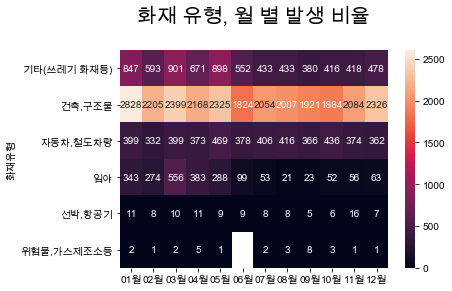

In [22]:
sns.heatmap(dfFstDiv, annot=True,vmin=0,vmax=2600, fmt='.0f')

plt.title('화재 유형, 월 별 발생 비율\n', fontsize=20)

plt.rcParams['figure.figsize']=(10,5)
plt.show()

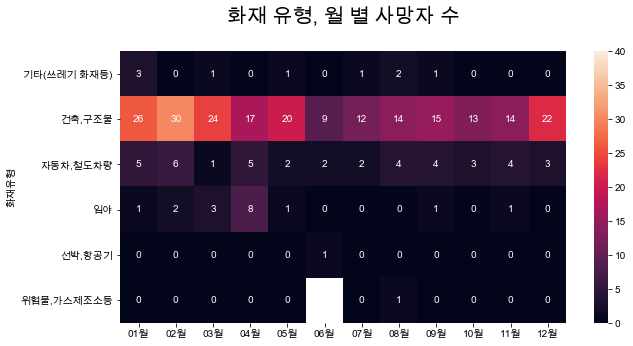

In [23]:
sns.heatmap(dfSecDiv, annot=True,vmin=0,vmax=40, fmt='.0f')

plt.title('화재 유형, 월 별 사망자 수\n', fontsize=20)

plt.rcParams["figure.figsize"] = (10,5)
plt.show()

## 시각화 - 화재 발생량과 사망 비율 비교

Text(1162.0909090909088, 0.5, '')

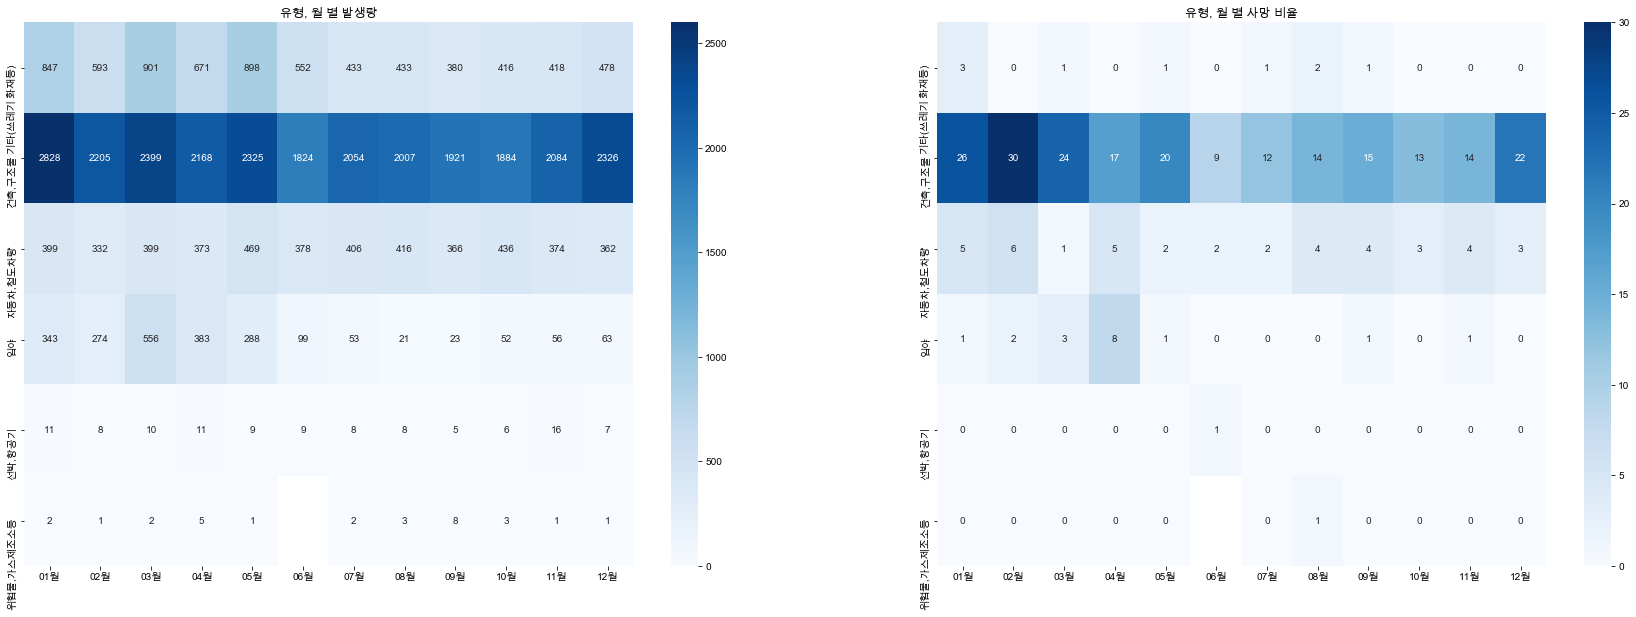

In [24]:
figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(30,10)

sns.heatmap(dfFstDiv, annot=True,vmin=0,vmax=2600, fmt='.0f', ax=ax1, cmap='Blues')
sns.heatmap(dfSecDiv, annot=True,vmin=0,vmax=30, fmt='.0f', ax=ax2, cmap='Blues')
ax1.set(title="유형, 월 별 발생량")
ax2.set(title="유형, 월 별 사망 비율")
ax1.set_ylabel('')
ax2.set_ylabel('')

In [25]:
dfCor = pd.DataFrame()

In [26]:
dfCor = dfCor.append(dfFstDiv.T['건축,구조물'])
dfCor = dfCor.rename(index={'건축,구조물':'건축,구조물 발생 회수'})
dfCor

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
"건축,구조물 발생 회수",2828.0,2205.0,2399.0,2168.0,2325.0,1824.0,2054.0,2007.0,1921.0,1884.0,2084.0,2326.0


In [27]:
dfCor = dfCor.append(dfSecDiv.T['건축,구조물'])
dfCor = dfCor.rename(index={'건축,구조물':'건축,구조물 사망자 수'})
dfCor

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
"건축,구조물 발생 회수",2828.0,2205.0,2399.0,2168.0,2325.0,1824.0,2054.0,2007.0,1921.0,1884.0,2084.0,2326.0
"건축,구조물 사망자 수",26.0,30.0,24.0,17.0,20.0,9.0,12.0,14.0,15.0,13.0,14.0,22.0


In [28]:
dfCor = dfCor.append(dfTrdDiv.T['건축,구조물'])
dfCor = dfCor.rename(index={'건축,구조물':'건축,구조물 부상자 수'})
dfCor

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
"건축,구조물 발생 회수",2828.0,2205.0,2399.0,2168.0,2325.0,1824.0,2054.0,2007.0,1921.0,1884.0,2084.0,2326.0
"건축,구조물 사망자 수",26.0,30.0,24.0,17.0,20.0,9.0,12.0,14.0,15.0,13.0,14.0,22.0
"건축,구조물 부상자 수",203.0,118.0,161.0,103.0,150.0,103.0,162.0,149.0,161.0,122.0,142.0,203.0


In [29]:
mask = np.zeros_like(dfCor.T.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

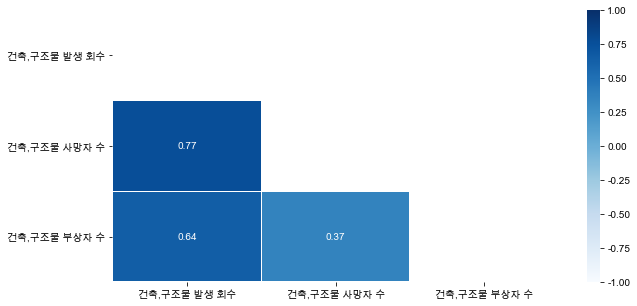

In [30]:
sns.heatmap(data=dfCor.T.corr(),
            cmap = 'Blues',
            fmt = '.2f',
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
#             cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )

In [31]:
data

,화재발생년월일,시도,시·군·구,읍면동,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,...,사망,부상,재산피해소계,장소대분류,장소중분류,장소소분류,onlyDay,onlyMonth,day,month
0,2019-01-01 00:03,강원도,삼척시,오분동,기타(쓰레기 화재등),"폭발물, 폭죽",폭죽,부주의,폭죽놀이,"종이,목재,건초등",...,0,1,0,기타,야외,기타야외,2019-01-01,2019-01,01,01월
1,2019-01-01 00:06,경기도,평택시,안중읍,"건축,구조물",미상,미상,미상,미상,미상,...,0,0,14900,주거,단독주택,단독주택,2019-01-01,2019-01,01,01월
2,2019-01-01 00:40,서울특별시,성북구,하월곡동,"자동차,철도차량",미상,미상,미상,미상,미상,...,0,0,3642,"자동차,철도차량",자동차,승용자동차,2019-01-01,2019-01,01,01월
3,2019-01-01 00:52,경기도,이천시,설성면,기타(쓰레기 화재등),화학적 발화열,화학반응열,화학적 요인,자연발화,"종이,목재,건초등",...,0,0,1848,기타,야외,야적장,2019-01-01,2019-01,01,01월
4,2019-01-01 01:06,부산광역시,부산진구,당감동,"건축,구조물",작동기기,기타(작동기기),전기적 요인,절연열화에 의한 단락,"전기,전자",...,0,0,45,기타서비스,기타건축물,기타 건축물,2019-01-01,2019-01,01,01월
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40098,2019-12-31 22:33,경기도,파주시,광탄면,"건축,구조물",작동기기,전기적 아크(단락),전기적 요인,접촉불량에 의한 단락,"전기,전자",...,0,0,23707,산업시설,공장시설,제재 및 목공업,2019-12-31,2019-12,31,12월
40099,2019-12-31 22:45,경상북도,경산시,남방동,"건축,구조물",미상,미상,미상,미상,"종이,목재,건초등",...,0,0,3542,산업시설,동식물시설,기타 동식물시설,2019-12-31,2019-12,31,12월
40100,2019-12-31 22:47,부산광역시,남구,문현동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,음식물 조리중,식품,...,0,0,0,"판매,업무시설",일반업무,오피스텔,2019-12-31,2019-12,31,12월
40101,2019-12-31 23:05,제주특별자치도,제주시,외도일동,"건축,구조물",작동기기,"기기 전도,복사열",부주의,가연물 근접방치,합성수지,...,0,0,105,"판매,업무시설",판매시설,할인점(마트),2019-12-31,2019-12,31,12월


# 월 별 일에 따른 화재 발생 Scatter

In [32]:
# delMonDup = data.drop_duplicates('month',keep='first') # 화재 유형 중복 제거
df_MonScatter = pd.DataFrame()

In [33]:
df_delOnlyMonthDup = data.drop_duplicates('onlyMonth', keep='first')['onlyMonth'].to_frame()

In [34]:
for i in df_delOnlyMonthDup['onlyMonth']:
    df_dayTemp = pd.DataFrame()
    filt = data.onlyMonth == i

    df_dayTemp= data.loc[filt,:]
    df_dayTemp=df_dayTemp['day'].groupby(df_dayTemp['onlyDay']).count().to_frame().reset_index().drop('onlyDay', axis=1)
    df_dayTemp.index = df_dayTemp.index + 1
    df_dayTemp = df_dayTemp.rename(columns={'day':i[5:]+'월'}).T
    df_MonScatter=df_MonScatter.append(df_dayTemp)
    
# df_MonScatter=df_MonScatter.T

In [35]:
# xlabels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
# df_MonScatter['day']=xlabels

In [36]:
df_MonScatter

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
01월,121,154,161,155,142,132,155,168,168,155,...,126,121,160,157,188,188,160,163.0,157.0,110.0
02월,122,117,113,92,109,92,110,128,119,115,...,121,126,131,133,152,122,126,NaN,NaN,NaN
03월,199,189,162,140,119,127,140,191,246,164,...,108,108,131,107,145,154,123,163.0,93.0,118.0
04월,168,177,203,191,168,193,148,174,134,87,...,135,88,72,76,57,92,68,73.0,93.0,NaN
05월,99,133,121,111,155,181,172,139,163,157,...,119,115,134,139,186,71,92,112.0,139.0,109.0
06월,93,133,141,131,130,118,87,79,70,64,...,107,117,109,138,90,91,95,59.0,74.0,NaN
07월,104,90,73,123,127,138,131,128,119,102,...,97,78,76,72,74,103,89,110.0,90.0,123.0
08월,111,101,101,93,110,125,95,87,102,107,...,98,98,76,86,98,79,68,69.0,85.0,97.0
09월,84,68,84,76,104,84,105,92,71,99,...,95,102,98,84,91,94,73,84.0,103.0,NaN
10월,64,103,92,75,63,87,86,66,112,92,...,94,86,71,97,111,101,80,91.0,84.0,105.0


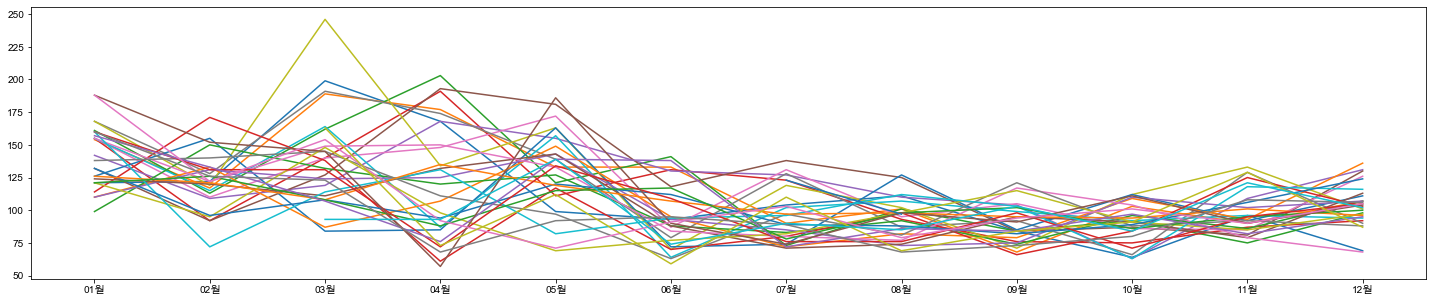

In [37]:
plt.figure(figsize=(25,5))

for i in df_MonScatter.columns:
    plt.plot(df_MonScatter.index, df_MonScatter[i])
# df_MonScatter.plot.scatter(x='day', y = '01월')
# df_MonScatter.plot.scatter(x='day', y = '02월')

In [38]:
for i in df_MonScatter.index:
    print(i)

01월
02월
03월
04월
05월
06월
07월
08월
09월
10월
11월
12월


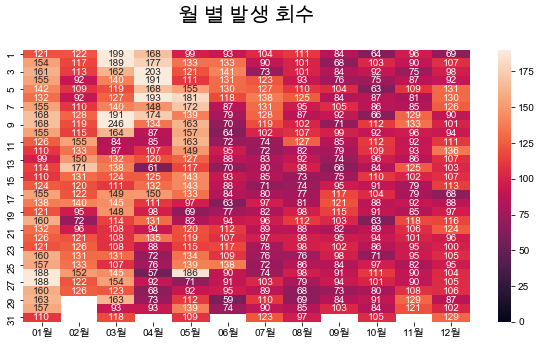

In [39]:
sns.heatmap(df_MonScatter.T, annot=True,vmin=0,vmax=190, fmt='.0f')

plt.title('월 별 발생 회수\n', fontsize=20)

plt.rcParams['figure.figsize']=(10,10)
plt.show()

In [40]:
df_MonScatter.T

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
1,121.0,122.0,199.0,168.0,99.0,93.0,104.0,111.0,84.0,64.0,96.0,69.0
2,154.0,117.0,189.0,177.0,133.0,133.0,90.0,101.0,68.0,103.0,90.0,107.0
3,161.0,113.0,162.0,203.0,121.0,141.0,73.0,101.0,84.0,92.0,75.0,98.0
4,155.0,92.0,140.0,191.0,111.0,131.0,123.0,93.0,76.0,75.0,87.0,92.0
5,142.0,109.0,119.0,168.0,155.0,130.0,127.0,110.0,104.0,63.0,109.0,131.0
6,132.0,92.0,127.0,193.0,181.0,118.0,138.0,125.0,84.0,87.0,81.0,130.0
7,155.0,110.0,140.0,148.0,172.0,87.0,131.0,95.0,105.0,86.0,85.0,126.0
8,168.0,128.0,191.0,174.0,139.0,79.0,128.0,87.0,92.0,66.0,129.0,90.0
9,168.0,119.0,246.0,134.0,163.0,70.0,119.0,102.0,71.0,112.0,133.0,101.0
10,155.0,115.0,164.0,87.0,157.0,64.0,102.0,107.0,99.0,92.0,96.0,94.0
